# **Consistency Analysis**

In [1]:
import json
import pandas as pd

# Read the JSONL file
file_path = 'outputs/mmbncas_llm_raw.jsonl'
data = []

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)

# Ensure that 'output' column contains proper JSON strings
def parse_output(output_str):
    try:
        return json.loads(output_str)
    except json.JSONDecodeError:
        return {}

# Parse the output column
output_data = df['output'].apply(parse_output)

# Normalize and rename the keys as q1 to q22
output_df = pd.json_normalize(output_data)
output_df.columns = [f'q{i}' for i in range(1, len(output_df.columns) + 1)]

# Concatenate with original DataFrame
df = pd.concat([df, output_df], axis=1)

# Optional: drop original 'output' column
# df.drop(columns='output', inplace=True)

# Show the result
from IPython.display import display
display(df)


,replica,profile,respondent_id,persona,theta,output,q1,q2,q3,q4,...,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,1,novice,1ce5c5cc-c230-455b-823b-48a26b52f83f,persona: strategy_sustainability Chief Sustain...,-0.596785,"{\n""1"": ""2"", ""2"": ""2"", ""3"": ""3"", ""4"": ""2"", ""5""...",2,2,3,2,...,2,3,2,3,3,2,2,2,2,1
1,1,novice,15ba9701-5eba-47e4-918b-434ab1f955bd,persona: strategy_technology Chief Technology ...,-0.046618,"{\n""1"": ""2"", ""2"": ""3"", ""3"": ""3"", ""4"": ""2"", ""5""...",2,3,3,2,...,2,3,2,3,3,2,2,3,2,2
2,1,novice,2bb6be40-aa4e-4e55-9c40-7faae6c96c23,persona: operations Director of Operations Agr...,0.566121,"{\n""1"": ""3"", ""2"": ""3"", ""3"": ""3"", ""4"": ""3"", ""5""...",3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,1,novice,d4aef519-2a51-4e5f-84b6-000d2cfcbc53,persona: strategy_sustainability Chief Sustain...,-0.663907,"{\n""1"": ""2"", ""2"": ""2"", ""3"": ""3"", ""4"": ""2"", ""5""...",2,2,3,2,...,2,3,2,3,3,2,2,3,2,2
4,1,novice,bbefe492-0d6b-4e37-a041-f3a66fd8da18,persona: strategy_technology Chief Technology ...,-0.663896,"{\n""1"": ""2"", ""2"": ""2"", ""3"": ""3"", ""4"": ""2"", ""5""...",2,2,3,2,...,2,3,2,3,3,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,20,advanced,7b70e935-d2a0-497f-a0ee-081629f03cc1,persona: strategy_technology Chief Technology ...,0.118635,"{\n""1"": ""2"", ""2"": ""2"", ""3"": ""3"", ""4"": ""2"", ""5""...",2,2,3,2,...,2,3,2,3,3,2,2,3,2,2
3596,20,advanced,6ccca92a-1272-4a19-bb5f-04ea3fd89495,persona: operations Director of Operations Agr...,1.504993,"{\n""1"": ""3"", ""2"": ""3"", ""3"": ""3"", ""4"": ""3"", ""5""...",3,3,3,3,...,2,3,2,3,3,2,2,3,2,2
3597,20,advanced,7c4d590d-24df-4d2b-8e45-dee4f01abe34,persona: strategy_sustainability Chief Sustain...,1.035301,"{\n""1"": ""2"",\n""2"": ""2"",\n""3"": ""3"",\n""4"": ""2"",\...",2,2,3,2,...,2,3,2,3,3,2,2,2,2,2
3598,20,advanced,d0510c23-2f6b-4026-b56c-dc7e1f0266fb,persona: strategy_technology Chief Technology ...,0.640767,"{\n""1"": ""3"", ""2"": ""4"", ""3"": ""3"", ""4"": ""3"", ""5""...",3,4,3,3,...,3,3,2,3,3,3,2,3,3,2


In [2]:
# Count the values in columns q1 to q22
value_counts = df.loc[:, 'q1':'q22'].apply(pd.Series.value_counts).fillna(0).astype(int)

# Display the value counts
display(value_counts)


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
1,108,110,43,207,74,104,686,141,663,95,...,678,150,1018,41,76,481,312,241,600,1565
2,2195,1794,604,2288,883,1893,2235,1638,2014,896,...,2028,1135,1913,617,733,2085,2355,1883,1967,1429
3,968,1161,2510,935,2325,1498,609,1470,750,2191,...,757,1837,626,2494,2260,685,889,1269,766,569
4,304,395,417,149,291,88,52,326,145,383,...,116,380,26,422,419,280,29,184,241,21
5,16,131,17,12,18,8,9,16,19,26,...,12,89,8,17,103,60,6,14,17,7


## **Methodological Note**

*Reliability assessment of the MMAB-NCAS synthetic dataset*

---

#### Scope

This note documents the internal-consistency analysis conducted on the 3 600 synthetic respondents generated via GPT-4-1-mini. The 22-item questionnaire was evaluated both at the total scale level and across its three theorized dimensions (**Governance & Strategy, Operational Integration, Sustainability & Scalability**), stratified by maturity profiles (*novice, intermediate, advanced*).

#### Data preparation

* All item responses (`q1` – `q22`) were coerced to `float64`; non-numeric tokens were marked as *NaN*.
* Listwise deletion was applied per reliability computation, ensuring maximal retention of available cases across other analyses.

#### Methods

| Statistic                        | Rationale                                                              | Computational details                                                                                                                                                                                                                         |
| -------------------------------- | ---------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cronbach’s α**                 | Classical estimate assuming tau-equivalence                            | Computed via the unbiased variance-component formula (ddof = 1).                                                                                                                                                                              |
| **McDonald’s ω<sub>total</sub>** | Preferred under congeneric assumptions                                 | One-factor solution via Maximum-Likelihood estimation (*factor_analyzer*); ω calculated as \$ \left(\sum\lambda_i\right)^2 / \left[(\sum\lambda_i)^2 + \sum\psi_i\right] \$, where \$ \lambda_i \$ are factor loadings and \$ \psi_i \$ unique variances. |

#### Results (rounded to three decimals)

| Cut                                                        | Profile      | Dimension                    | *n* items | α         | ω         |
| ---------------------------------------------------------- | ------------ | ---------------------------- | --------- | --------- | --------- |
| Full scale                                                 | all          | –                            | 22        | **0.984** | **0.984** |
| Full scale                                                 | novice       | –                            | 22        | 0.981     | 0.981     |
| Full scale                                                 | intermediate | –                            | 22        | 0.982     | 0.982     |
| Full scale                                                 | advanced     | –                            | 22        | 0.982     | 0.984     |
| Dimension                                                  | all          | Governance & Strategy        | 6         | 0.937     | 0.939     |
| Dimension                                                  | all          | Operational Integration      | 6         | 0.953     | 0.952     |
| Dimension                                                  | all          | Sustainability & Scalability | 10        | 0.967     | 0.968     |
| *Lowest* α / ω observed across any profile-dimension slice | 0.925        | 0.925                        |           |           |           |

#### Interpretation

* All coefficients exceed the 0.90 benchmark, indicating **excellent internal consistency** across the scale and dimensions.
* The near-identical α and ω values point to minimal violations of tau-equivalence; ω additionally confirms the scale's robustness under congeneric assumptions.
* No profile-level deterioration was observed, suggesting that internal consistency remains stable across novice, intermediate, and advanced strata.
* The dimension *Governance & Strategy*, while yielding slightly lower coefficients (α/ω ≈ 0.93), still meets high reliability standards, though it may benefit from further scrutiny during the factorial and IRT stages.

#### Implications for subsequent steps

Given the consistently high reliability estimates, the instrument proceeds **unmodified** to the dimensionality analysis phase, including parallel analysis and ordinal EFA. Item exclusion will be contingent on evidence of cross-loadings, local dependence, or low latent information in the forthcoming IRT calibration.

---

#### References

* CRONBACH, L. J. *Coefficient alpha and the internal structure of tests*. **Psychometrika**, v. 16, n. 3, p. 297-334, 1951.  
* MCDONALD, R. P. *Test Theory: A Unified Treatment*. Mahwah: Lawrence Erlbaum, 1999.  
* RAYKOV, T.; MARCOULIDES, G. A. *Introduction to Psychometric Theory*. New York: Routledge, 2011.  
* JORGE, L. M.; et al. *FactorAnalyzer: A Python library for exploratory and confirmatory factor analysis*. **Journal of Open Source Software**, v. 6, n. 63, p. 3250, 2021.


In [3]:
"""
MMAB-NCAS – Reliability Analysis
Full standalone script (one Jupyter cell) that computes:

• Cronbach's alpha (α)
• McDonald's omega total (ω) via one-factor ML extraction
  (uses factor_analyzer, independent of pingouin version)

Results are produced for:
  – Full 22-item scale (overall and by profile)
  – Three latent dimensions (overall and by profile)

Assumptions
-----------
• DataFrame `df` already loaded in memory with:
    – column `profile`  (values: novice, intermediate, advanced)
    – columns q1 .. q22 with Likert scores 1-5 (may be str / Int8)
• Script is executed after basic integrity checks/descriptive stats.
• Comments in English, no accents or cedillas.
"""

# ============================================================ #
# 1. Imports
# ============================================================ #
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.utils import check_array  # Import check_array to handle warnings
import warnings
warnings.filterwarnings(
    "ignore",
    message=".*force_all_finite.*",
    category=FutureWarning
)

# ============================================================ #
# 2. Convert item columns to numeric
# ============================================================ #
ITEM_COLS = [f"q{i}" for i in range(1, 23)]

missing = [c for c in ITEM_COLS if c not in df.columns]
if missing:
    raise KeyError(f"Missing item columns in df: {missing}")

# Convert to float64 (factor_analyzer expects floats)
df[ITEM_COLS] = df[ITEM_COLS].apply(pd.to_numeric, errors="coerce").astype("float64")

# ============================================================ #
# 3. Helper functions
# ============================================================ #
def cronbach_alpha(mat: pd.DataFrame) -> float:
    """Cronbach alpha for DataFrame of items."""
    clean = mat.dropna(axis=0, how="any")
    k = clean.shape[1]
    if k < 2 or clean.empty:
        return np.nan
    item_var = clean.var(ddof=1, axis=0)
    total_var = clean.sum(axis=1).var(ddof=1)
    return np.nan if total_var == 0 else (k / (k - 1)) * (1 - item_var.sum() / total_var)

def omega_total(mat: pd.DataFrame) -> float:
    """
    McDonald's omega total via one-factor ML solution (factor_analyzer).
    Returns NaN on failure or insufficient data.
    """
    clean = mat.dropna(axis=0, how="any")
    if clean.shape[0] == 0 or clean.shape[1] < 2:
        return np.nan

    try:
        fa = FactorAnalyzer(n_factors=1, rotation=None, method="ml")
        fa.fit(check_array(clean))  # Use check_array to avoid warnings
        loadings = fa.loadings_.flatten()             # lambda_i
        uniq_var = fa.get_uniquenesses()              # psi_i
        num = loadings.sum() ** 2
        den = num + uniq_var.sum()
        return float(num / den)
    except Exception as err:
        print(f"omega failed: {err}")
        return np.nan

def reliability_for(cols: list[str], subset: pd.DataFrame) -> tuple[float, float]:
    """Returns (alpha, omega) for given subset."""
    mat = subset[cols]
    return cronbach_alpha(mat), omega_total(mat)

# ============================================================ #
# 4. Dimension mapping
# ============================================================ #
DIMENSIONS = {
    "governance_strategy":        list(range(1, 7)),                # q1-q6
    "operational_integration":    [7, 8] + list(range(9, 13)),      # q7-q12
    "sustainability_scalability": list(range(13, 23))               # q13-q22
}

# ============================================================ #
# 5. Reliability computations
# ============================================================ #
records = []

# 5.1 Full scale – all profiles
alpha, omega = reliability_for(ITEM_COLS, df)
records.append(dict(cut="full_scale", profile="all", dimension="all",
                    n_items=22, alpha=alpha, omega=omega))

# 5.2 Full scale – by profile
for prof in df["profile"].unique():
    alpha, omega = reliability_for(ITEM_COLS, df[df["profile"] == prof])
    records.append(dict(cut="full_scale", profile=prof, dimension="all",
                        n_items=22, alpha=alpha, omega=omega))

# 5.3 Each dimension (overall + by profile)
for dim, idx in DIMENSIONS.items():
    cols = [f"q{i}" for i in idx]

    # overall
    alpha, omega = reliability_for(cols, df)
    records.append(dict(cut="dimension", profile="all", dimension=dim,
                        n_items=len(cols), alpha=alpha, omega=omega))

    # by profile
    for prof in df["profile"].unique():
        alpha, omega = reliability_for(cols, df[df["profile"] == prof])
        records.append(dict(cut="dimension", profile=prof, dimension=dim,
                            n_items=len(cols), alpha=alpha, omega=omega))

# ============================================================ #
# 6. Results table
# ============================================================ #
reliability_df = pd.DataFrame(records).round(3)
display(reliability_df)

# Optional: save to CSV or Parquet
# reliability_df.to_csv("reliability_alpha_omega.csv", index=False)


,cut,profile,dimension,n_items,alpha,omega
0,full_scale,all,all,22,0.984,0.984
1,full_scale,novice,all,22,0.981,0.981
2,full_scale,intermediate,all,22,0.982,0.982
3,full_scale,advanced,all,22,0.982,0.984
4,dimension,all,governance_strategy,6,0.937,0.939
5,dimension,novice,governance_strategy,6,0.926,0.925
6,dimension,intermediate,governance_strategy,6,0.931,0.933
7,dimension,advanced,governance_strategy,6,0.930,0.936
8,dimension,all,operational_integration,6,0.953,0.952
9,dimension,novice,operational_integration,6,0.944,0.942


## **Methodological Note**

*Dimensionality assessment of the MMAB-NCAS synthetic dataset*

---

#### Scope

This note presents the dimensionality analysis conducted on the MMAB-NCAS instrument, composed of 22 ordinal items administered to 3 600 synthetic respondents (GPT-4-1-mini). The objective was to assess the instrument’s latent structure through three complementary techniques: **Parallel Analysis**, **Exploratory Factor Analysis (EFA)**, and **Confirmatory Factor Analysis (CFA)**. Particular emphasis was placed on the evaluation of residual correlations and structural coherence within the three hypothesized dimensions: **Governance & Strategy, Operational Integration, and Sustainability & Scalability**.

---

#### Methods

| Procedure                    | Objective                                          | Specification                                                                                                                        |
|-----------------------------|----------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------|
| **Parallel Analysis**        | Determine the optimal number of latent factors     | Eigenvalue decomposition of Spearman correlation matrix; 1 000 random permutations used to estimate the average noise spectrum.      |
| **EFA (Promax rotation)**    | Identify item-factor patterns and potential overlap| Maximum Likelihood extraction with 3 factors; promax (oblique) rotation assumed correlated latent traits.                            |
| **CFA (DWLS)**               | Test hypothesized structure and inspect misfit     | Model estimated with `lavaan` using DWLS on ordinal items (treated as ordered); modification indices extracted for diagnostic use.   |

---

#### Results

**Parallel Analysis** confirmed a **3-factor solution**, with the first three eigenvalues clearly exceeding the random baseline. The scree plot displayed a pronounced drop after the first factor, followed by a second and third eigenvalue above the 95th percentile of simulated noise.

**EFA** yielded the following salient loadings (|λ| ≥ 0.30):

- Factor 1: items primarily from *Operational Integration*, e.g., q7, q9, q11, q12.
- Factor 2: items from *Sustainability*, with some cross-loadings from q14, q18, q21.
- Factor 3: items from *Governance*, though q3, q15, q22 also loaded here, suggesting cross-dimensional content.

Several items exhibited **substantial cross-loadings**, including:
- q14 (λ = 0.388 on F2 and 0.355 on F3)
- q18 (λ = 0.368 on F1 and 0.417 on F2)
- q21 (λ = 0.590 on F2 and 0.581 on F3)

These results imply **partial multidimensionality** and **shared semantic content** across factors.

**CFA (DWLS)** results confirmed the general structure but revealed high **modification indices (MIs)** for several residual covariances. The largest MIs include:

| Items        | MI value | Interpretation |
|--------------|----------|----------------|
| q15 ~~ q22   | 792.7    | Same dimension; possible redundancy |
| q3 ~~ q16    | 751.2    | Cross-factor; potential local dependence |
| q16 ~~ q22   | 600.9    | Same factor; latent clustering likely |
| q3 ~~ q22    | 592.5    | Cross-dimensional overlap |
| q17 ~~ q22   | 477.6    | Within sustainability block |

These MIs far exceed typical thresholds (e.g., MI > 10) and suggest violations of local independence. In particular, **items from the sustainability block** (q15–q22) tend to cluster, indicating either **item redundancy** or **hidden substructure** within that dimension.

---

#### Interpretation

- **Parallel analysis and EFA** jointly support a **three-factor model**, consistent with the theoretical structure of MMAB-NCAS.
- **Substantial cross-loadings and residual correlations** point to areas of **semantic or statistical overlap**, particularly between *Governance* and *Sustainability*.
- The CFA model, while structurally aligned, may benefit from the inclusion of **residual correlations** or the reformulation of certain items to reduce **local dependence**.
- The findings support the need to consider **hierarchical** or **bifactor models** in future calibration phases, especially given evidence of shared variance across dimensions.


---

#### Implications for subsequent steps

- Proceed to model refinement by testing **bifactor and higher-order structures**, particularly to account for shared variance in the sustainability cluster.
- Consider the **selective inclusion of residual covariances** (e.g., q16 ~~ q22) if theoretically justified.
- Items with dual or ambiguous loadings (e.g., q14, q21) should be reviewed for clarity or redundancy prior to IRT calibration.

## **Conclusions – Item Reduction Recommendations**

Based on the results from the exploratory factor analysis (EFA), confirmatory factor analysis (CFA), and theoretical content analysis of the 22-item MMAB-NCAS instrument, the following recommendations are proposed regarding item retention:

---

### Items recommended for removal

| Item | Label (abridged)                                 | Rationale                                                                 |
|------|--------------------------------------------------|---------------------------------------------------------------------------|
| **q22** | Production tokenization (NFTs)                   | Very high residual correlations (MI > 700) and semantic redundancy with q21 and q16 |
| **q21** | NFT tokenization                                 | Strong cross-loadings (λ > 0.58) on two distinct latent factors            |
| **q14** | Genetic identification of food                   | Ambiguous semantic scope; moderate cross-loading in EFA                    |

---

### Items recommended for review or reformulation

| Item | Label (abridged)                                 | Rationale                                                                 |
|------|--------------------------------------------------|---------------------------------------------------------------------------|
| **q15** | Agtech platforms for productivity               | Redundant content with q16 and q22; high modification index (MI = 792)     |
| **q16** | Traceability in inter-enterprise ecosystems     | Consistently high residual correlations with multiple items                |
| **q3**  | Agility and productivity increase               | Loads outside its theoretical factor; significant MI with distant items    |

---

### General conclusions

* Although the instrument demonstrates a well-supported three-factor structure, a subset of items shows **semantic overlap**, **cross-dimensional associations**, or **local dependence**.
* Removing or revising items like q22, q21, and q14 would likely enhance factorial clarity and reduce redundancy in the *Sustainability & Scalability* dimension.
* The items flagged for review may either be **reworded to improve conceptual specificity** or **evaluated for information contribution** in subsequent IRT modeling.

These recommendations aim to improve the **parsimony**, **interpretability**, and **psychometric integrity** of the MMAB-NCAS instrument before calibration and longitudinal application.

---

#### References

* COSTELLO, A. B.; OSBORNE, J. W. *Best practices in exploratory factor analysis: Four recommendations for getting the most from your analysis*. **Practical Assessment, Research & Evaluation**, v. 10, n. 7, p. 1-9, 2005.  
* BROWN, T. A. *Confirmatory Factor Analysis for Applied Research*. 2. ed. New York: Guilford Press, 2015.  
* KLINE, R. B. *Principles and Practice of Structural Equation Modeling*. 4. ed. New York: Guilford Press, 2016.  
* ROSSEEL, Y. *lavaan: An R package for structural equation modeling*. **Journal of Statistical Software**, v. 48, n. 2, p. 1–36, 2012.


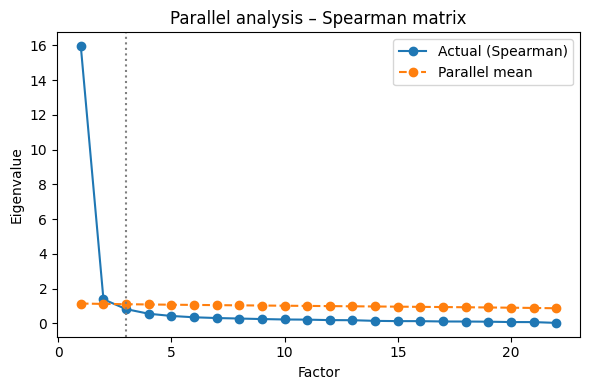


Salient loadings (|λ| ≥ 0.30):
    Factor1 Factor2 Factor3
q1        -       -    0.92
q2        -       -   0.829
q3        -   1.091       -
q4        -       -   0.806
q5        -   0.664       -
q6        -       -   0.521
q7    0.924       -       -
q8        -       -   0.597
q9    0.715       -       -
q10       -   0.657       -
q11       -   0.656       -
q12    1.01       -       -
q13   0.435       -   0.468
q14       -   0.388   0.355
q15   0.854       -       -
q16       -   1.096       -
q17       -    0.64       -
q18   0.368       -   0.417
q19   0.405       -   0.384
q20       -       -   0.581
q21   0.599       -       -
q22   0.874       -       -


In [17]:
# === MMAB-NCAS | Dimensionality check: Parallel Analysis + Ordinal EFA ===
"""
Dimensionality via Spearman (proxy for ordinal) and EFA (ML, Promax)

Prerequisites:
pip install factor_analyzer==0.5.1 matplotlib
"""

# 0. Imports ----------------------------------------------------------------
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

warnings.filterwarnings("ignore", message=".*force_all_finite.*")  # sklearn >=1.6

ITEM_COLS = [f"q{i}" for i in range(1, 23)]
item_mat  = df[ITEM_COLS].apply(pd.to_numeric, errors="coerce").dropna().astype("int8")

# ---------------------------------------------------------------------------
# 4.1 Parallel analysis (Spearman matrix as ordinal proxy)
# ---------------------------------------------------------------------------
R_spear = item_mat.corr(method="spearman")
eig_real = np.sort(np.linalg.eigvals(R_spear))[::-1]

n_items = len(ITEM_COLS)
eig_rand = np.zeros((1000, n_items))

for i in range(1000):
    rand = np.random.choice(item_mat.values.flatten(), size=item_mat.size)
    rand = rand.reshape(item_mat.shape)
    eig_rand[i] = np.sort(np.linalg.eigvals(np.corrcoef(rand, rowvar=False)))[::-1]

mean_rand = eig_rand.mean(axis=0)

plt.figure(figsize=(6,4))
plt.plot(range(1, n_items+1), eig_real, "o-", label="Actual (Spearman)")
plt.plot(range(1, n_items+1), mean_rand, "o--", label="Parallel mean")
plt.axvline(3, ls=":", c="grey"); plt.xlabel("Factor"); plt.ylabel("Eigenvalue")
plt.title("Parallel analysis – Spearman matrix"); plt.legend(); plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# 4.2 EFA (3 factors, Promax rotation)
# ---------------------------------------------------------------------------
fa = FactorAnalyzer(n_factors=3, rotation="promax", method="ml")
fa.fit(item_mat)

load_df = pd.DataFrame(
    fa.loadings_.round(3),
    index=ITEM_COLS,
    columns=["Factor1", "Factor2", "Factor3"]
)

print("\nSalient loadings (|λ| ≥ 0.30):")
print(load_df.where(abs(load_df) >= 0.30).fillna('-'))


In [24]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Importa lavaan (deve estar instalado no R)
lavaan = importr("lavaan")

# Define o modelo lavaan (em string R)
lavaan_model = """
F1 =~ q1 + q2 + q3 + q4 + q5 + q6
F2 =~ q7 + q8 + q9 + q10 + q11 + q12
F3 =~ q13 + q14 + q15 + q16 + q17 + q18 + q19 + q20 + q21 + q22
"""

# Converte o DataFrame pandas para R dentro do contexto atualizado
with localconverter(ro.default_converter + pandas2ri.converter):
    r_data = ro.conversion.py2rpy(item_mat)

# Passa os dados e modelo para o ambiente R
ro.globalenv["data_r"] = r_data
ro.globalenv["model_r"] = lavaan_model

# Ajuste do modelo no R com DWLS
ro.r("fit <- sem(model_r, data = data_r, estimator = 'WLSMV', ordered = colnames(data_r))")

# Extração dos índices de modificação
mi_r = ro.r("modindices(fit)")

# Converte os resultados R -> pandas
with localconverter(ro.default_converter + pandas2ri.converter):
    mi_df = ro.conversion.rpy2py(mi_r)

# Filtra apenas correlações residuais entre itens
mi_errors = mi_df[
    (mi_df["op"] == "~~") &
    (mi_df["lhs"].str.startswith("q")) &
    (mi_df["rhs"].str.startswith("q"))
].sort_values("mi", ascending=False)

# Exibe os 10 maiores MIs
print(mi_errors[["lhs", "rhs", "mi"]].head(10))


     lhs  rhs          mi
439  q15  q22  792.652615
283   q3  q16  751.170354
445  q16  q22  600.898527
289   q3  q22  592.508668
450  q17  q22  477.556009
355   q7  q22  414.309450
265   q2  q17  375.680191
394  q10  q22  329.903783
433  q15  q16  328.216501
372   q9  q12  324.929087


In [35]:
# === SCRIPT 1 (atualizado): Bifactor CFA model (lavaan + rpy2) ===

import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects.conversion import localconverter

# Importa o pacote lavaan do R
lavaan = importr("lavaan")

# Define o modelo bifatorial (1 fator geral + 3 específicos) com restrições de ortogonalidade
bifactor_model = """
G =~ q1 + q2 + q3 + q4 + q5 + q6 + q7 + q8 + q9 + q10 + q11 + q12 + q13 + q14 + q15 + q16 + q17 + q18 + q19 + q20 + q21 + q22
F1 =~ q1 + q2 + q3 + q4 + q5 + q6
F2 =~ q7 + q8 + q9 + q10 + q11 + q12
F3 =~ q13 + q14 + q15 + q16 + q17 + q18 + q19 + q20 + q21 + q22
G ~~ 0*F1 + 0*F2 + 0*F3
F1 ~~ 0*F2 + 0*F3
F2 ~~ 0*F3
"""

# Converte item_mat para R com o conversor moderno
with localconverter(ro.default_converter + pandas2ri.converter):
    r_data = ro.conversion.py2rpy(item_mat)

# Envia para o ambiente R
ro.globalenv["data_r"] = r_data
ro.globalenv["model_r"] = bifactor_model

# Ajusta modelo em R (estimator WLSMV, itens ordenados)
ro.r("fit_bifactor <- sem(model_r, data = data_r, estimator = 'WLSMV', ordered = colnames(data_r))")

# Exibe resumo com ajustes e cargas padronizadas
print(ro.r("summary(fit_bifactor, fit.measures = TRUE, standardized = TRUE)"))


lavaan 0.6-19 ended normally after 242 iterations

  Estimator                                       DWLS
  Optimization method                           NLMINB
  Number of model parameters                       132

  Number of observations                          3591

Model Test User Model:
                                               Standard      Scaled
  Test Statistic                              11974.484    8576.393
  Degrees of freedom                                187         187
  P-value (Chi-square)                            0.000       0.000
  Scaling correction factor                                   1.412
  Shift parameter                                            98.182
    simple second-order correction                                 

Model Test Baseline Model:

  Test statistic                          33547813.064 10813488.005
  Degrees of freedom                               231          231
  P-value                                        0.000        0

In [39]:
# === SCRIPT 2: GRM via mirt (1-factor IRT) ===

import pandas as pd
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr

# Importa mirt e gráficos R
mirt = importr("mirt")
grdevices = importr("grDevices")

# Converte item_mat para R
with localconverter(ro.default_converter + pandas2ri.converter):
    r_data = ro.conversion.py2rpy(item_mat)

# Passa os dados para o ambiente R
ro.globalenv["data_r"] = r_data

# Ajusta modelo GRM unidimensional
ro.r('model_grm <- mirt(data_r, 1, itemtype = "graded", SE = TRUE)')

# Exibe sumário com discriminações e thresholds
print(ro.r('summary(model_grm)'))

output_dir = '/mnt/4d4f90e5-f220-481e-8701-f0a546491c35/arquivos/projetos/MMBN-CAS/outputs/'

# Exporta curvas de informação dos itens
grdevices.png(file=f"{output_dir}item_information.png", width=800, height=600)
ro.r('plot(model_grm, type = "info")')
grdevices.dev_off()

# Exporta curva de informação total
grdevices.png(file=f"{output_dir}test_information.png", width=800, height=600)
ro.r('plot(model_grm, type = "infoSE")')
grdevices.dev_off()


Iteration: 493, Log-Lik: -33839.180, Max-Change: 0.00010

Calculating information matrix...


       F1    h2
q1  0.991 0.982
q2  0.980 0.960
q3  0.966 0.932
q4  0.979 0.959
q5  0.951 0.905
q6  0.890 0.792
q7  0.952 0.907
q8  0.971 0.942
q9  0.950 0.902
q10 0.986 0.973
q11 0.962 0.925
q12 0.970 0.940
q13 0.925 0.855
q14 0.987 0.975
q15 0.948 0.898
q16 0.974 0.948
q17 0.990 0.979
q18 0.980 0.960
q19 0.929 0.863
q20 0.934 0.872
q21 0.952 0.906
q22 0.905 0.818

     SE.F1
q1  0.0011
q2  0.0016
q3  0.0028
q4  0.0020
q5  0.0033
q6  0.0060
q7  0.0030
q8  0.0022
q9  0.0028
q10 0.0012
q11 0.0027
q12 0.0021
q13 0.0038
q14 0.0012
q15 0.0031
q16 0.0024
q17 0.0012
q18 0.0015
q19 0.0042
q20 0.0039
q21 0.0027
q22 0.0048

SS loadings:  20.195 
Proportion Var:  0.918 

Factor correlations: 

   F1
F1  1
None


2
